## Q1. Import Libraries/Dataset 

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import  roc_auc_score, classification_report
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
%matplotlib inline

## Q2. Data Visualization and Exploration

#### a. Print at least 5 rows for sanity check to identify all the features present in the dataset and if the target matches with them.

In [4]:
new_col_names = ['carat','cut','color','clarity','depth_percent','table','price','length','width','depth']
input_df = pd.read_csv("diamonds.csv", names=new_col_names, skiprows=1)
input_df.head()
# coverting x,y,z into length, width, height as described in the metadata

,carat,cut,color,clarity,depth_percent,table,price,length,width,depth
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


#### b. Print the description and shape of the dataset.

In [ ]:
print("Shape of Input:")
input_df.shape
# 10 columns with 53940 datapoints

Shape of Input:


(53940, 10)

In [7]:
print("Input Description:") 
input_df.describe

Input Description:


<bound method NDFrame.describe of        carat        cut color clarity  depth_percent  table  price  length  \
0       0.23      Ideal     E     SI2           61.5   55.0    326    3.95   
1       0.21    Premium     E     SI1           59.8   61.0    326    3.89   
2       0.23       Good     E     VS1           56.9   65.0    327    4.05   
3       0.29    Premium     I     VS2           62.4   58.0    334    4.20   
4       0.31       Good     J     SI2           63.3   58.0    335    4.34   
...      ...        ...   ...     ...            ...    ...    ...     ...   
53935   0.72      Ideal     D     SI1           60.8   57.0   2757    5.75   
53936   0.72       Good     D     SI1           63.1   55.0   2757    5.69   
53937   0.70  Very Good     D     SI1           62.8   60.0   2757    5.66   
53938   0.86    Premium     H     SI2           61.0   58.0   2757    6.15   
53939   0.75      Ideal     D     SI2           62.2   55.0   2757    5.83   

       width  depth  
0      

#### d. Do the correlational analysis on the dataset. Provide a visualization for the same

In [9]:
"""
Encoding logic for cut_category, color and clarity as desbribed in Metadata
"""
def categorize_cut(row):
    if row['cut'] == 'Fair':
        return 1.0
    elif row['cut'] == 'Good':
        return 2.0
    elif row['cut'] == 'Very Good':
        return 3.0
    elif row['cut'] == 'Premium':
        return 4.0
    elif row['cut'] == 'Ideal':
        return 5.0
    else:
        return 0
def categorize_color(row):
    if row['color'] == 'D':
        return 1.0
    elif row['color'] == 'E':
        return 2.0
    elif row['color'] == 'F':
        return 3.0
    elif row['color'] == 'G':
        return 4.0
    elif row['color'] == 'H':
        return 5.0
    elif row['color'] == 'I':
        return 6.0
    elif row['color'] == 'J':
        return 7.0
    else:
        return 0
def categorize_clarity(row):
    if row['clarity'] == 'IF':
        return 1.0
    elif row['clarity'] == 'VVS1':
        return 2.0
    elif row['clarity'] == 'VVS2':
        return 3.0
    elif row['clarity'] == 'VS1':
        return 4.0
    elif row['clarity'] == 'VS2':
        return 5.0
    elif row['clarity'] == 'SI1':
        return 6.0
    elif row['clarity'] == 'SI2':
        return 7.0
    elif row['clarity'] == 'I1':
        return 8.0
    else:
        return 0

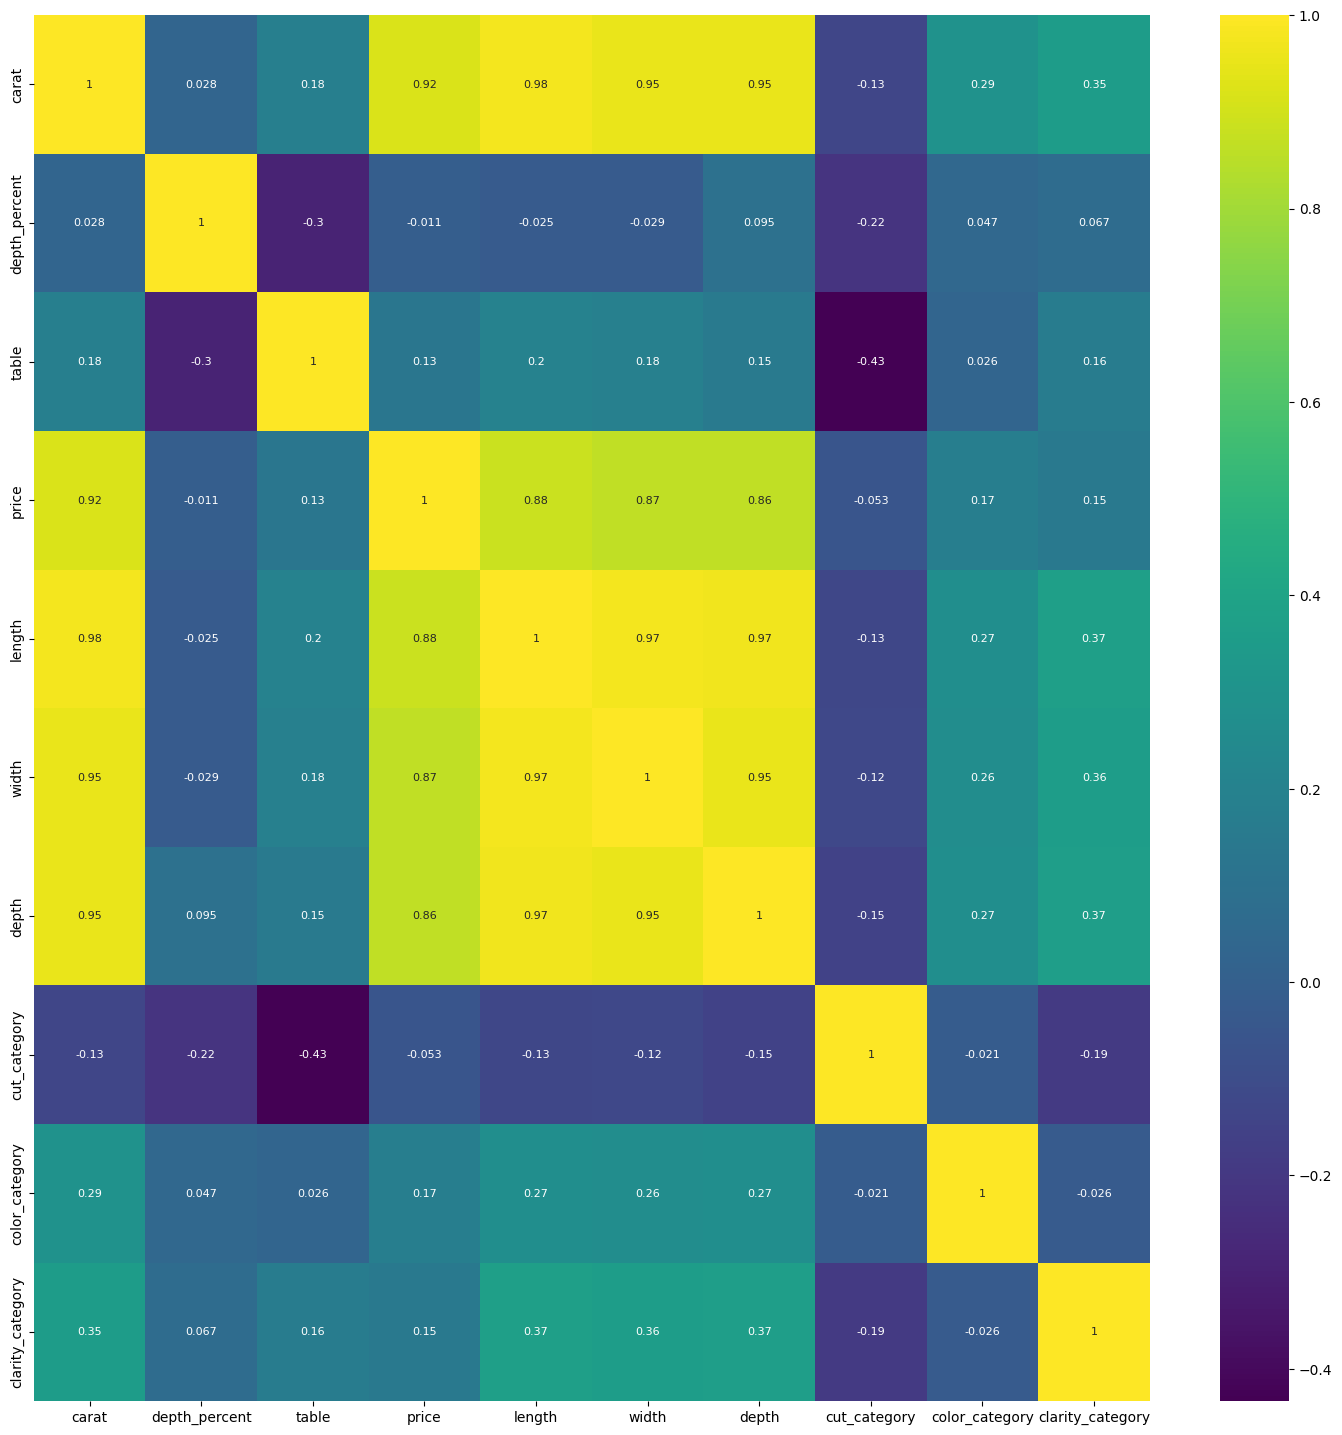

In [10]:
input_copy = input_df.copy()
input_copy['cut_category'] = input_copy.apply(categorize_cut, axis=1) # creating numerical target from alphanumeric target
input_copy['color_category'] = input_copy.apply(categorize_color, axis=1) # creating numerical target from alphanumeric target
input_copy['clarity_category'] = input_copy.apply(categorize_clarity, axis=1) # creating numerical target from alphanumeric target
cpy_dropped=input_copy.drop(['cut','color','clarity'],axis=1)

plt.figure(figsize=(18,18))
cor1 = cpy_dropped.corr()
sns.heatmap(cor1, annot=True, cmap="viridis",annot_kws={"size":8})
plt.show()

#### c. Provide appropriate visualization to get an insight about the dataset

In [11]:
def percent_outliers_iqr(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers = df[(df[feature] < lower) | (df[feature] > upper)]
    percent = len(outliers) / len(df) * 100
    
    # print(f"Outliers in '{feature}': {len(outliers)} out of {len(df)} ({percent:.2f}%)")
    return percent

In [12]:
# Create a dataframe for plotting
outlier_percent = {}
for col in input_copy.select_dtypes(include=np.number).columns :
    outlier_percent[col]=percent_outliers_iqr(input_copy, col)
outlier_df = pd.DataFrame(outlier_percent.items(), columns=['Feature', 'Outlier_Percentage'])

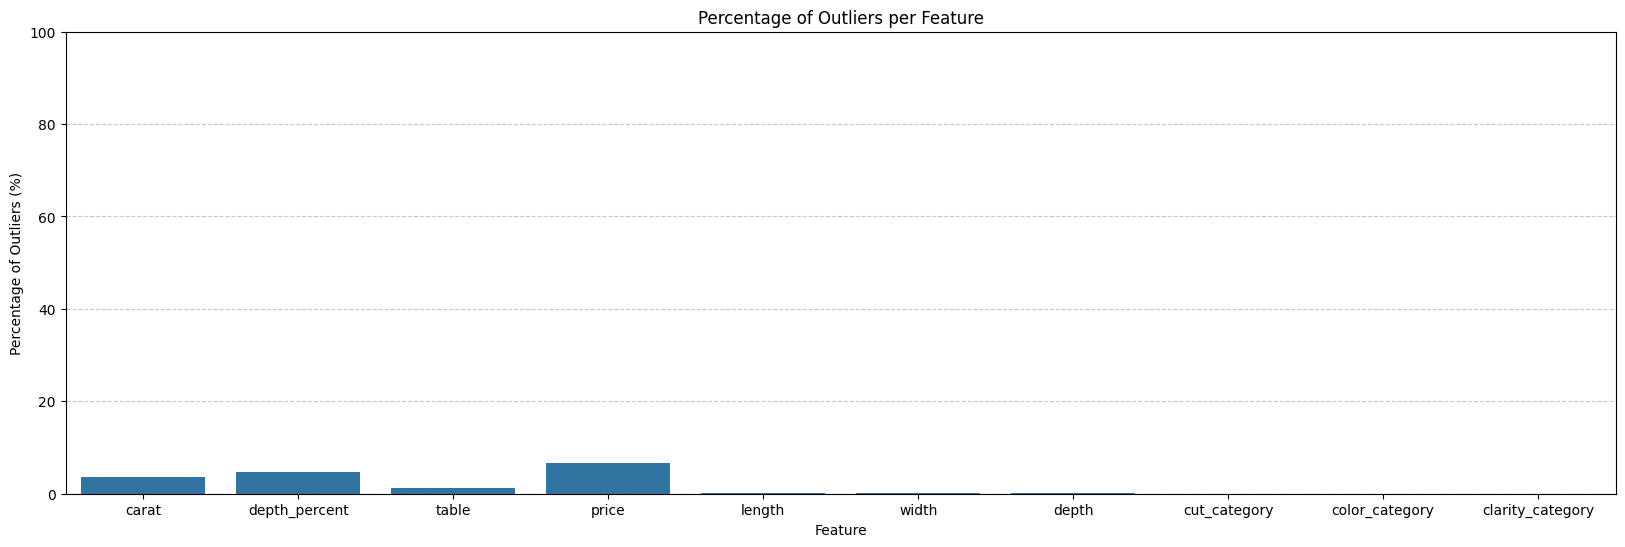

In [13]:
plt.figure(figsize=(20, 6))
sns.barplot(x='Feature', y='Outlier_Percentage', data=outlier_df)
plt.title('Percentage of Outliers per Feature')
plt.xlabel('Feature')
plt.ylabel('Percentage of Outliers (%)')
plt.ylim(0, 100) # Ensure y-axis goes up to 100%
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Outlier Analysis on the basis of above plot
Hence, in the input data, there are no outliers exceeding 5-6%. Therefore, **'mean' SimpleImputer** can be used to replace any missing value with the respective mean values. Also, will use the **Standard Scalar** to scale the data which uses z-score. 
Also We notice high outlier percentage in **depth_percent** and **price**. I have written python code to pick the best features out of 9 features.

## Q3. Data Pre-processing and cleaning

#### a. Perform appropriate pre-processing of the data

In [ ]:
# Define Feature and Targets
y = cpy_dropped['cut_category'] # Target Column
X = cpy_dropped.drop('cut_category',axis=1)
print(f"Feature Shape: {X.shape} and Target Shape: {y.shape}")
#Define Features and Targets


Feature Shape: (53940, 9) and Target Shape: (53940,)


In [15]:
# Impute missing values in features
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

In [16]:
# Feature Scaling to handle outliers
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)
print(X_scaled)

[[-1.19816781 -0.17409151 -1.09967199 ... -1.57112919 -0.93716275
   1.24521508]
 [-1.24036129 -1.36073849  1.58552871 ... -1.74117497 -0.93716275
   0.63809506]
 [-1.19816781 -3.38501862  3.37566251 ... -1.74117497 -0.93716275
  -0.57614496]
 ...
 [-0.20662095  0.73334442  1.13799526 ...  0.03013526 -1.52502147
   0.63809506]
 [ 0.13092691 -0.52310533  0.24292836 ...  0.28520393  0.8264134
   1.24521508]
 [-0.10113725  0.31452784 -1.09967199 ...  0.14349912 -1.52502147
   1.24521508]]


In [17]:
# Check correlations for each feature with the target
cor_output=[]
scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
# Traverse through all columns of the dataframe to calculate Pearson's r coefficient
for col in scaled_df.columns:
    feat = scaled_df[col]
    corr, _ = pearsonr(feat, y)
    cor_output.append((col, corr))

# Sort the above correlations list of tuples by increasing order of r coefficient
sorted_output_r = sorted(cor_output, key=lambda x: x[1])
selected_feature_list = sorted_output_r[:6]

print(f"""Top 6 features effecting the target(cut_category) are :
      {selected_feature_list}""")


Top 6 features effecting the target(cut_category) are :
      [('table', -0.43340460648144763), ('depth_percent', -0.21805500914169051), ('clarity_category', -0.18917474400795686), ('depth', -0.14932253650521551), ('carat', -0.13496702034499983), ('length', -0.12556523668377842)]


# Correlation Analysis

As per correlation analysis of different features w.r.t to each other in the Heatmap, we could see few features with r coefficient tending to 0. Also as per the X-Y plots, we see little outliers, therefore, i chose

1. SimpleImputer with mean strategy to replace all the null values (missing values) into mean value of the respective feature.
2. StandardScalar to minimize the effect of outliers by transforming them to not have mean=0 but a standard deviation =1. The amount of outliers noticed is less, therefore, shouldn't effect the prediction.
3. Pearson's correlation coeffiecient to compare and reduce the number of features. In the above step, from the scaled dataframe, we are calculating Pearson's r coefficient of all features w.r.t the Target(cut_category). Taking best 6
4. The top 6 features selected does not include **price**.Which should be beneficial. Although **depth_percentage** had higher outlier%, its highly correlated with the target **cut_category**. Therefore, we will use this feature for training and validations

# **Enforce best 6 features**

In [18]:
selected_feature_list_str = [i[0] for i in selected_feature_list]
print(scaled_df.columns)
for cols in scaled_df.columns:
    if cols not in selected_feature_list_str:
        scaled_df = scaled_df.drop(cols,axis=1)
print(scaled_df.columns)

Index(['carat', 'depth_percent', 'table', 'price', 'length', 'width', 'depth',
       'color_category', 'clarity_category'],
      dtype='object')
Index(['carat', 'depth_percent', 'table', 'length', 'depth',
       'clarity_category'],
      dtype='object')


## Q4. Model Building

#### a.Split the dataset into training and test sets.

In [19]:
X_train_main, X_test_main, y_train_main, y_test_main = train_test_split(scaled_df, y, test_size=0.2, random_state=42) # Split Train-Test data to 80%-20%
X_train_secondary, X_test_secondary, y_train_secondary, y_test_secondary = train_test_split(scaled_df, y, test_size=0.3, random_state=42) # Split Train-Test data to 70%-30%
print(f"Shape of 1st data split : Train{X_train_main.shape}  Test {X_test_main.shape}")
print(f"Shape of 2nd data split : Train{X_train_secondary.shape} Test {X_test_secondary.shape}")
y_test_main_df = pd.DataFrame(y_test_main)
y_test_secondary_df = pd.DataFrame(y_test_secondary)

Shape of 1st data split : Train(43152, 6)  Test (10788, 6)
Shape of 2nd data split : Train(37758, 6) Test (16182, 6)


* Implement predictive models/classifiers using the following classification approaches
    + Logistic Regression
    + Decision Tree
    + K-nearest Neighbour
    + Ensemble Methods(Choosing BaggingClassifier)
* Tune hyperparameters


In [20]:
# Logistic Regression
logistic_model_main = LogisticRegression(solver='liblinear') # default classfier
logistic_model_secondary = LogisticRegression(solver='liblinear') # default classfier
lmm_clf = logistic_model_main.fit(X_train_main.iloc[:, :].values,y_train_main)
lms_clf = logistic_model_secondary.fit(X_train_secondary.iloc[:, :].values,y_train_secondary)

c:\Users\vaibh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1288: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
c:\Users\vaibh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1288: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


In [23]:
# Logistic Regression Tuned with a more complex level of solver
logistic_model_main_tuned = LogisticRegression(solver='newton-cholesky')
logistic_model_secondary_tuned = LogisticRegression(solver='newton-cholesky') 
lmmt_clf = logistic_model_main_tuned.fit(X_train_main.iloc[:, :].values,y_train_main)
lmst_clf = logistic_model_secondary_tuned.fit(X_train_secondary.iloc[:, :].values,y_train_secondary)

In [24]:
# DescisionTree
tree_model_main = DecisionTreeClassifier()
tree_model_secondary = DecisionTreeClassifier()
tmm_clf = tree_model_main.fit(X_train_main,y_train_main)
tms_clf = tree_model_secondary.fit(X_train_secondary,y_train_secondary)

In [25]:
# DescisionTree Tuned with maximizing the depth the tree can go. Setting random_state to a specific integer value seeds the random number generator used in these internal processes.
tree_model_main_tuned = DecisionTreeClassifier(criterion = 'entropy',max_depth=100,random_state=55)
tree_model_secondary_tuned = DecisionTreeClassifier(criterion = 'entropy',max_depth=100,random_state=55)
tmmt_clf = tree_model_main_tuned.fit(X_train_main,y_train_main)
tmst_clf = tree_model_secondary_tuned.fit(X_train_secondary,y_train_secondary)

In [26]:
# K Neighbour Classification
neighbour_model_main = KNeighborsClassifier()
neighbour_model_secondary = KNeighborsClassifier()
nmm_clf = neighbour_model_main.fit(X_train_main,y_train_main)
nms_clf = neighbour_model_secondary.fit(X_train_secondary,y_train_secondary)


In [27]:
# K Neighbour Classification Tuned with sqrt(len(test_data))=k, distance-based weights.
neighbour_model_main_tuned = KNeighborsClassifier(n_neighbors=104,algorithm='ball_tree',weights='distance',p=2)
neighbour_model_secondary_tuned = KNeighborsClassifier(n_neighbors=104,algorithm='ball_tree',weights='distance',p=2)
nmmt_clf = neighbour_model_main_tuned.fit(X_train_main,y_train_main)
nmst_clf = neighbour_model_secondary_tuned.fit(X_train_secondary,y_train_secondary)

In [28]:
# Bagging Classifier (Ensemble Library)
base_model = DecisionTreeClassifier()
bagging = BaggingClassifier(estimator=base_model)
rfm_clf = bagging.fit(X_train_main,y_train_main)
rfs_clf = bagging.fit(X_train_secondary,y_train_secondary)


In [29]:
# Bagging Classifier (Ensemble Library) Tuned with KNN
base_model_2 = KNeighborsClassifier()
bagging_tuned = BaggingClassifier(estimator=base_model_2,n_estimators=50,random_state=42)
# gbc_model_main_tuned = RandomForestClassifier(n_estimators=200,max_depth=1)
# gbc_model_secondary_tuned = RandomForestClassifier(n_estimators=200,max_depth=1)
rfmt_clf = bagging_tuned.fit(X_train_main,y_train_main)
rfst_clf = bagging_tuned.fit(X_train_secondary,y_train_secondary)


## Q5. Performance Evaluation

* Compare the performances of each model/classifier considering the given dataset using different evaluation measures such as Precision, Recall, F1-Score, AUC-ROC. 
* Identify the model, which you think is the best amongst all the models that have been trained.

In [30]:
# Run Predictions on above models

logistic_model_main_pred = logistic_model_main.predict(X_test_main)
logistic_model_secondary_pred = logistic_model_secondary.predict(X_test_secondary)
logistic_model_main_tuned_pred = logistic_model_main_tuned.predict(X_test_main)
logistic_model_secondary_tuned_pred = logistic_model_secondary_tuned.predict(X_test_secondary)
tree_model_main_pred = tree_model_main.predict(X_test_main)
tree_model_secondary_pred = tree_model_secondary.predict(X_test_secondary)
tree_model_main_tuned_pred = tree_model_main_tuned.predict(X_test_main)
tree_model_secondary_tuned_pred = tree_model_secondary_tuned.predict(X_test_secondary)
neighbour_model_main_pred = neighbour_model_main.predict(X_test_main)
neighbour_model_secondary_pred = neighbour_model_secondary.predict(X_test_secondary)
neighbour_model_main_tuned_pred = neighbour_model_main_tuned.predict(X_test_main)
neighbour_model_secondary_tuned_pred = neighbour_model_secondary_tuned.predict(X_test_secondary)
gbc_model_main_pred = bagging.predict(X_test_main)
gbc_model_secondary_pred = bagging.predict(X_test_secondary)
gbc_model_main_tuned_pred = bagging.predict(X_test_main)
gbc_model_secondary_tuned_pred = bagging.predict(X_test_secondary)


c:\Users\vaibh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\vaibh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\vaibh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\vaibh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


## Performance Analysis Tabulation and Comparison
Below are the steps to get accuracy, precision, recall, f1-score from classification report.

In [31]:
models = ['LogisticRegression','LogisticRegression-Tuned', 'DecisionTreeClassifier','DecisionTreeClassifier-Tuned', 'KNeighborsClassifier','KNeighborsClassifier-Tuned', 'BaggingClassifier', 'BaggingClassifier-Tuned']
accuracy_accumulator = []
precision_accumulator = []
recall_accumulator = []
f1s_accumulator = []

In [32]:
#Gather stats on Logistic Regression on default and tuned models
cr_main = classification_report(y_test_main, logistic_model_main_pred,output_dict=True)
cr_tuned = classification_report(y_test_main, logistic_model_main_tuned_pred,output_dict=True)
acc, precision, recall, f1s = cr_main['accuracy'], cr_main['weighted avg']['precision'], cr_main['weighted avg']['recall'], cr_main['weighted avg']['f1-score']
accuracy_accumulator.append(acc)
precision_accumulator.append(precision)
recall_accumulator.append(recall)
f1s_accumulator.append(f1s)

acc, precision, recall, f1s = cr_tuned['accuracy'], cr_tuned['weighted avg']['precision'], cr_tuned['weighted avg']['recall'], cr_tuned['weighted avg']['f1-score']
accuracy_accumulator.append(acc)
precision_accumulator.append(precision)
recall_accumulator.append(recall)
f1s_accumulator.append(f1s)

print(f1s_accumulator)

[0.5790426680761084, 0.6136241361861978]


In [33]:
# Gather stats on Decision Tree Model Report on 80-20 Train-Test Split data for default and Hyperparameter tuned model
cr_tm_main = classification_report(y_test_main, tree_model_main_pred, output_dict=True)
cr_tm_main_tuned = classification_report(y_test_main, tree_model_main_tuned_pred, output_dict=True)
acc, precision, recall, f1s = cr_tm_main['accuracy'], cr_tm_main['weighted avg']['precision'], cr_tm_main['weighted avg']['recall'], cr_tm_main['weighted avg']['f1-score']
accuracy_accumulator.append(acc)
precision_accumulator.append(precision)
recall_accumulator.append(recall)
f1s_accumulator.append(f1s)

acc, precision, recall, f1s = cr_tm_main_tuned['accuracy'], cr_tm_main_tuned['weighted avg']['precision'], cr_tm_main_tuned['weighted avg']['recall'], cr_tm_main_tuned['weighted avg']['f1-score']
accuracy_accumulator.append(acc)
precision_accumulator.append(precision)
recall_accumulator.append(recall)
f1s_accumulator.append(f1s)

In [34]:
# Gathering stats for k-neighbour Model Report on 80-20 Train-Test Split data for default and Hyperparameter tuned model
cr_knn_main = classification_report(y_test_main, neighbour_model_main_pred, output_dict=True)
cr_knn_main_tuned = classification_report(y_test_main, neighbour_model_main_tuned_pred, output_dict=True)
acc, precision, recall, f1s = cr_knn_main['accuracy'], cr_knn_main['weighted avg']['precision'], cr_knn_main['weighted avg']['recall'], cr_knn_main['weighted avg']['f1-score']
accuracy_accumulator.append(acc)
precision_accumulator.append(precision)
recall_accumulator.append(recall)
f1s_accumulator.append(f1s)

acc, precision, recall, f1s = cr_knn_main_tuned['accuracy'], cr_knn_main_tuned['weighted avg']['precision'], cr_knn_main_tuned['weighted avg']['recall'], cr_knn_main_tuned['weighted avg']['f1-score']
accuracy_accumulator.append(acc)
precision_accumulator.append(precision)
recall_accumulator.append(recall)
f1s_accumulator.append(f1s)

In [35]:
# gathering stats for Random Forest Model Report on 80-20 Train-Test Split data for default and Hyperparameter tuned model
cr_rfm_main = classification_report(y_test_main, gbc_model_main_pred, output_dict=True)
cr_rfm_main_tuned = classification_report(y_test_main, gbc_model_main_tuned_pred, output_dict=True)

acc, precision, recall, f1s = cr_rfm_main['accuracy'], cr_rfm_main['weighted avg']['precision'], cr_rfm_main['weighted avg']['recall'], cr_rfm_main['weighted avg']['f1-score']
accuracy_accumulator.append(acc)
precision_accumulator.append(precision)
recall_accumulator.append(recall)
f1s_accumulator.append(f1s)

acc, precision, recall, f1s = cr_rfm_main_tuned['accuracy'], cr_rfm_main_tuned['weighted avg']['precision'], cr_rfm_main_tuned['weighted avg']['recall'], cr_rfm_main_tuned['weighted avg']['f1-score']
accuracy_accumulator.append(acc)
precision_accumulator.append(precision)
recall_accumulator.append(recall)
f1s_accumulator.append(f1s)


## ROC-AUC Scores

In [36]:
# gather roc_auc scores for all models
roc_auc_accumulator = []
roc_auc_log_reg_main = roc_auc_score(y_test_main, lmm_clf.predict_proba(X_test_main.iloc[:, :].values), multi_class='ovo')
roc_auc_accumulator.append(roc_auc_log_reg_main)
roc_auc_log_reg_main_tuned = roc_auc_score(y_test_main, lmmt_clf.predict_proba(X_test_main.iloc[:, :].values), multi_class='ovo')
roc_auc_accumulator.append(roc_auc_log_reg_main_tuned)

roc_auc_tree_model_main = roc_auc_score(y_test_main, tmm_clf.predict_proba(X_test_main.iloc[:, :].values), multi_class='ovo')
roc_auc_accumulator.append(roc_auc_tree_model_main)
roc_auc_tree_model_main_tuned = roc_auc_score(y_test_main, tmmt_clf.predict_proba(X_test_main.iloc[:, :].values), multi_class='ovo')
roc_auc_accumulator.append(roc_auc_tree_model_main_tuned)

roc_auc_neigh_main = roc_auc_score(y_test_main, nmm_clf.predict_proba(X_test_main.iloc[:, :].values), multi_class='ovo')
roc_auc_accumulator.append(roc_auc_neigh_main)
roc_auc_neigh_main_tuned = roc_auc_score(y_test_main, nmmt_clf.predict_proba(X_test_main.iloc[:, :].values), multi_class='ovo')
roc_auc_accumulator.append(roc_auc_neigh_main_tuned)

roc_auc_rf_model_main = roc_auc_score(y_test_main, rfm_clf.predict_proba(X_test_main.iloc[:, :].values), multi_class='ovo')
roc_auc_accumulator.append(roc_auc_rf_model_main)
roc_auc_rf_model_main_tuned = roc_auc_score(y_test_main, rfmt_clf.predict_proba(X_test_main.iloc[:, :].values), multi_class='ovo')
roc_auc_accumulator.append(roc_auc_rf_model_main_tuned)

c:\Users\vaibh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\vaibh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\vaibh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\vaibh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\vaibh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn

In [37]:
#Display comparison chart
df_metrics = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy_accumulator,
    'Precision': precision_accumulator,
    'Recall': recall_accumulator,
    'F1-Score': f1s_accumulator,
    'ROC AUC': roc_auc_accumulator
})

df_metrics.set_index('Model', inplace=True)

df_metrics.sort_values(by='F1-Score', ascending=False)

,Accuracy,Precision,Recall,F1-Score,ROC AUC
Model,,,,,
BaggingClassifier,0.723674,0.718809,0.723674,0.720945,0.903920
BaggingClassifier-Tuned,0.723674,0.718809,0.723674,0.720945,0.878193
DecisionTreeClassifier-Tuned,0.679459,0.681539,0.679459,0.680425,0.804581
DecisionTreeClassifier,0.673897,0.675941,0.673897,0.674875,0.801130
KNeighborsClassifier-Tuned,0.694846,0.672871,0.694846,0.670465,0.878486
KNeighborsClassifier,0.673897,0.662454,0.673897,0.667031,0.862945
LogisticRegression-Tuned,0.644420,0.624206,0.644420,0.613624,0.777334
LogisticRegression,0.630886,0.596695,0.630886,0.579043,0.765562


## Final Inference
Infering from all the metrics, from the above table, which shows comparison of different model, we can say for the given dataset, **Ensemble Model (Bagging Classifier)** performs best at classifying the Test data which we have split 80-20 Train-Test. The answer is based on good **F1-SCORE** and highest **PRECISION**. Also it performs this best on default, with tuned model just few scores away. The second best is the **DecisionTree** which is the base learner for the above Ensemble Classifier. We can see the Ensemble working better than Decision Tree by employing more number of smaller **Decision Tree** models and making better predictions on the same dataset.